## Data exploration and preprocessing 

### Data example

In [1]:
from project.src.read_data import read_data

# Load the data

data = read_data('C:\\Users\\chudz\\Desktop\\StudiesF\\MiSD\\Projekt\\data\\data.json')

print(data.head())

        City    Floor Furnished     Market     Price Building type  Area  \
0  Białystok  floor_4       yes  secondary  395000.0          blok    42   
1  Białystok  floor_3       yes  secondary  455900.0          blok    39   
2  Białystok  floor_0       yes  secondary  700000.0          blok  58.7   
3  Białystok  floor_0        no  secondary  412000.0          blok    56   
4  Białystok  floor_1       yes  secondary  585000.0          blok  54.5   

   Rooms  Distance to city center  
0    two                 2.568302  
1  three                 1.181512  
2  three                 3.272476  
3  three                 2.568302  
4  three                 3.910908  


### Processing the data


The data preprocessing phase involves several transformations to tidy up and standardize the data before further analysis. These transformations are crucial for ensuring data consistency and optimizing computational efficiency across the dataset. Specifically, the preprocessing steps include:
    
    Location Transformation

    Floor Level Conversion
    
    Boolean Value Transformation
    
    Market Type Conversion
    
    Room Count Conversion
    
    Building Type Mapping
    
    


In [2]:
from src.process_data import Preprocessor

preprocessor = Preprocessor(data)

print(preprocessor.preprocessed_data.head())


   Floor     Price  Area  Rooms  Distance to city center  Furnished_no  \
0      4  395000.0  42.0      2                 2.568302           0.0   
1      3  455900.0  39.0      3                 1.181512           0.0   
2      0  700000.0  58.7      3                 3.272476           0.0   
3      0  412000.0  56.0      3                 2.568302           1.0   
4      1  585000.0  54.5      3                 3.910908           0.0   

   Furnished_yes  Building type_apartamentowiec  Building type_blok  \
0            1.0                            0.0                 1.0   
1            1.0                            0.0                 1.0   
2            1.0                            0.0                 1.0   
3            0.0                            0.0                 1.0   
4            1.0                            0.0                 1.0   

   Building type_kamienica  ...  City_Olsztyn  City_Opole  City_Poznań  \
0                      0.0  ...           0.0         

 ## Look at the data

We would like to see corellation beetwen:
    - Location and price
    - Floor and price
    - Area and price
    - Room number and price
    - Room number and area
    - If_furnished and price
    - Building type and price
    - Market and price
    

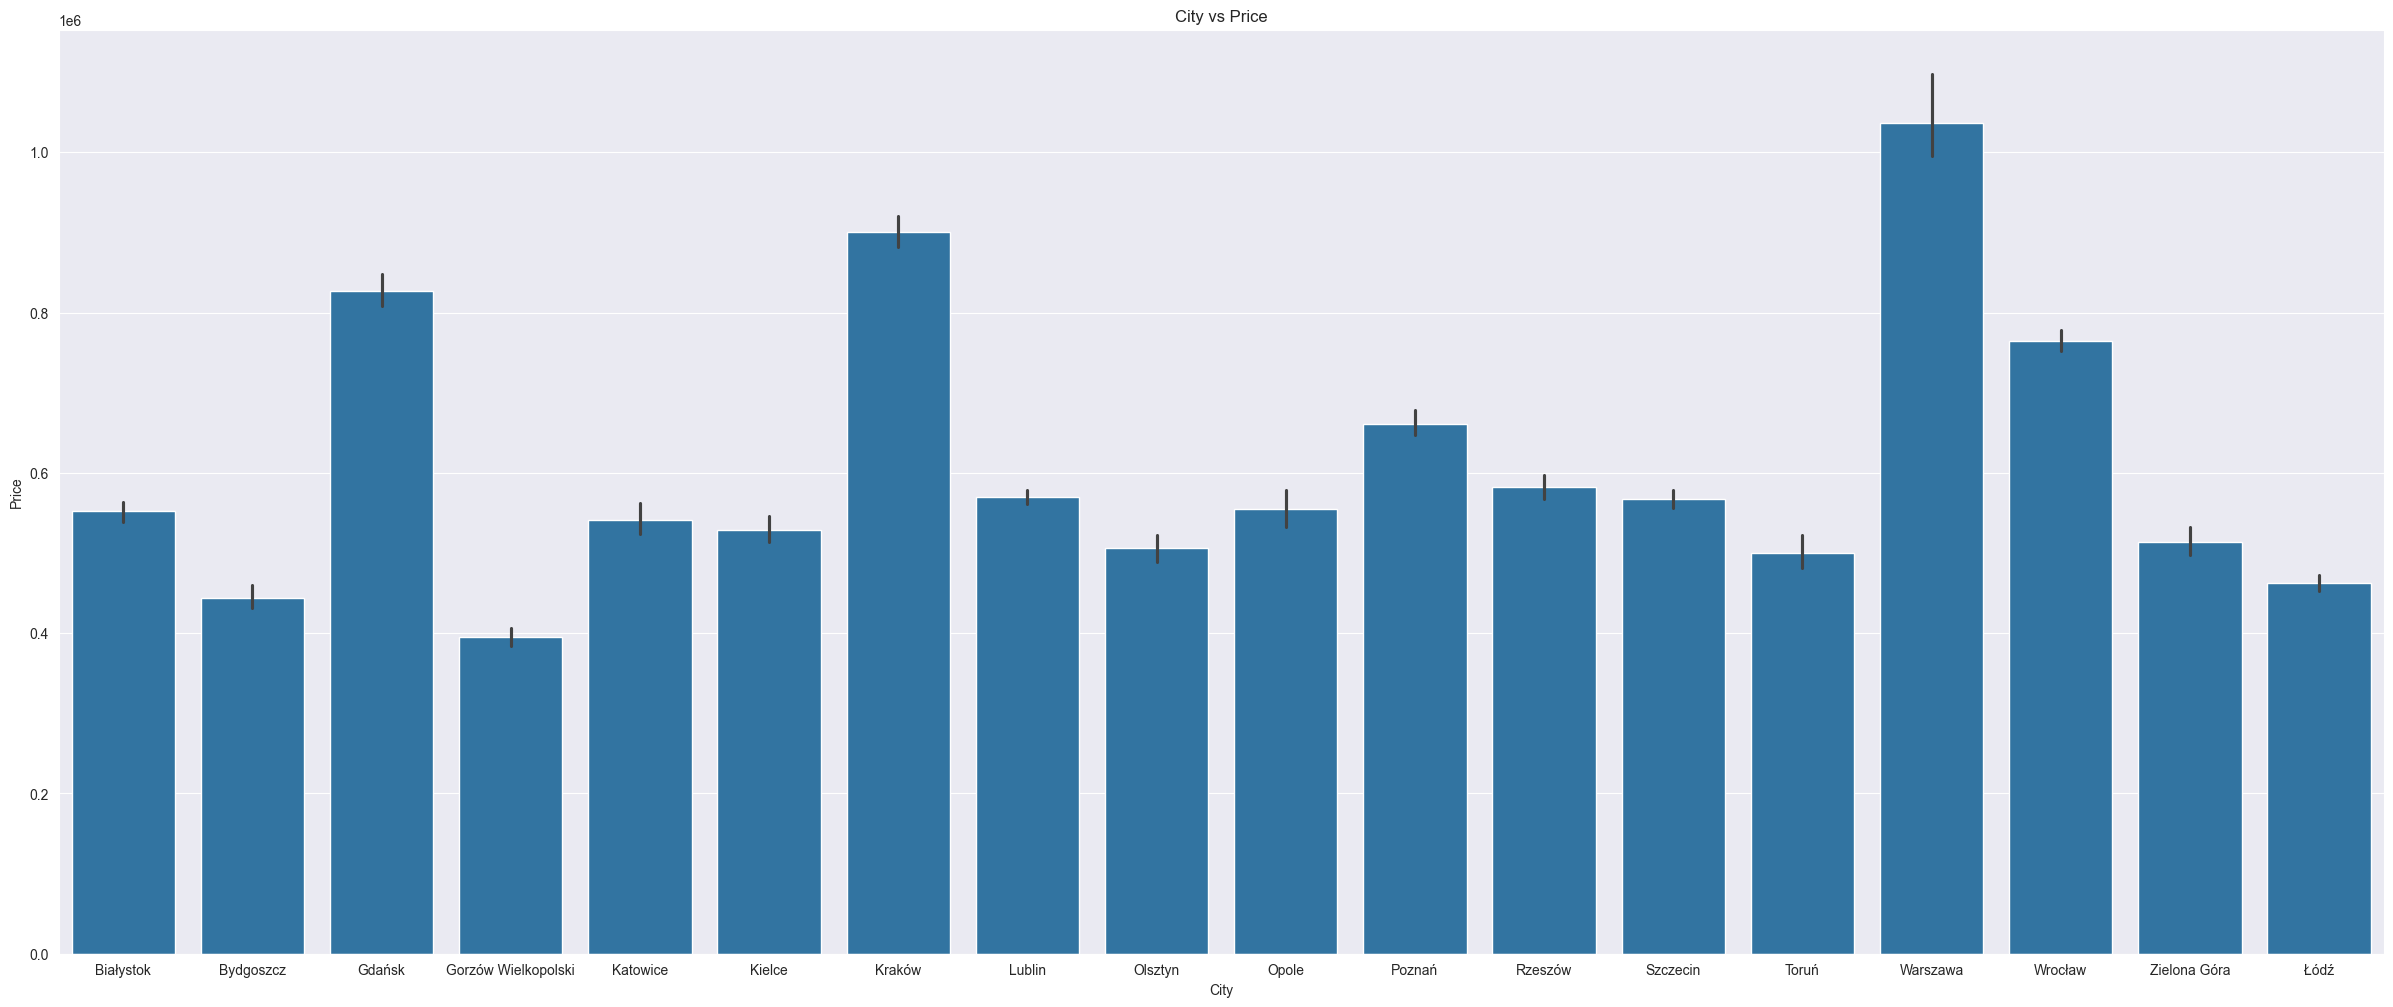

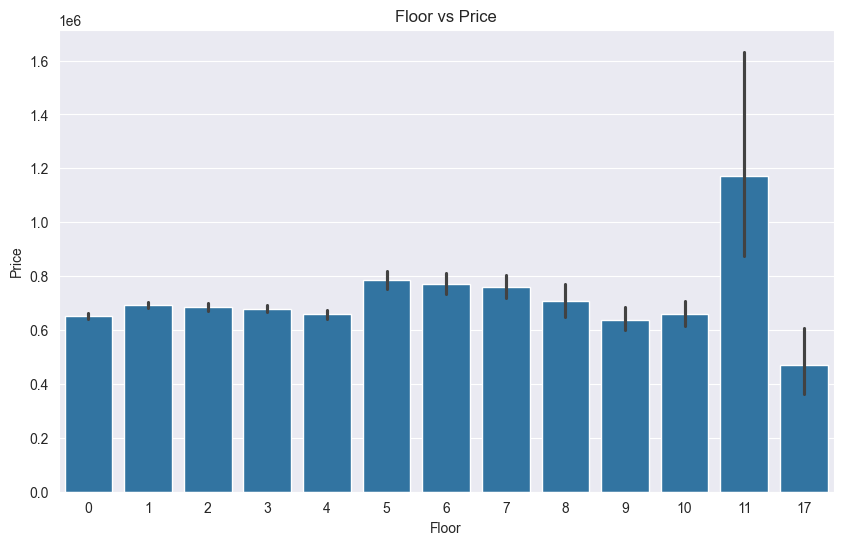

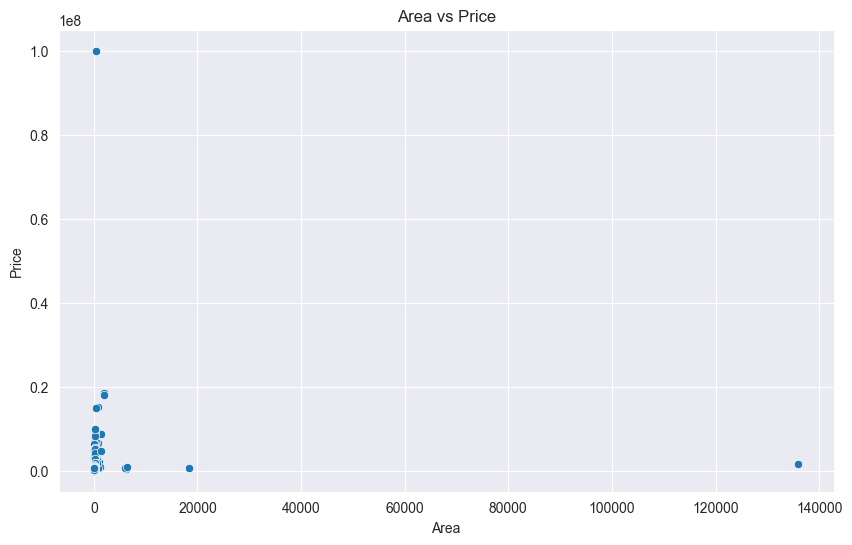

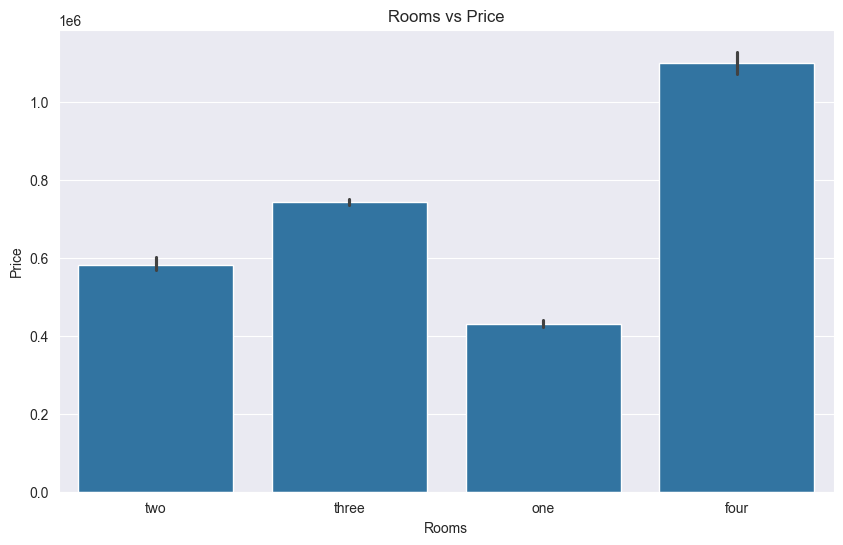

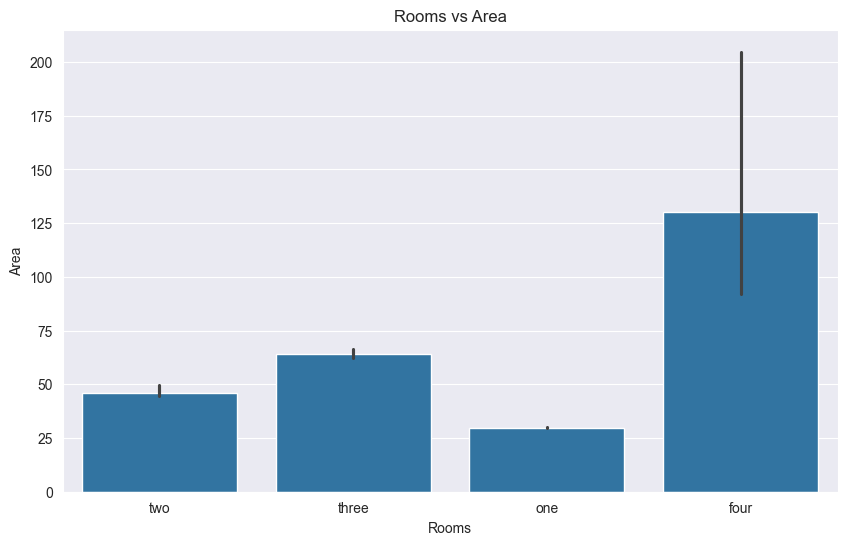

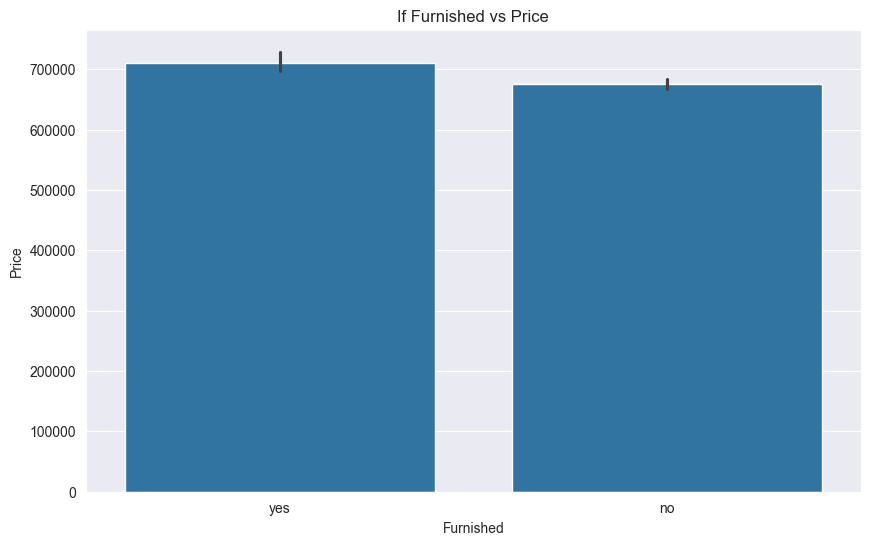

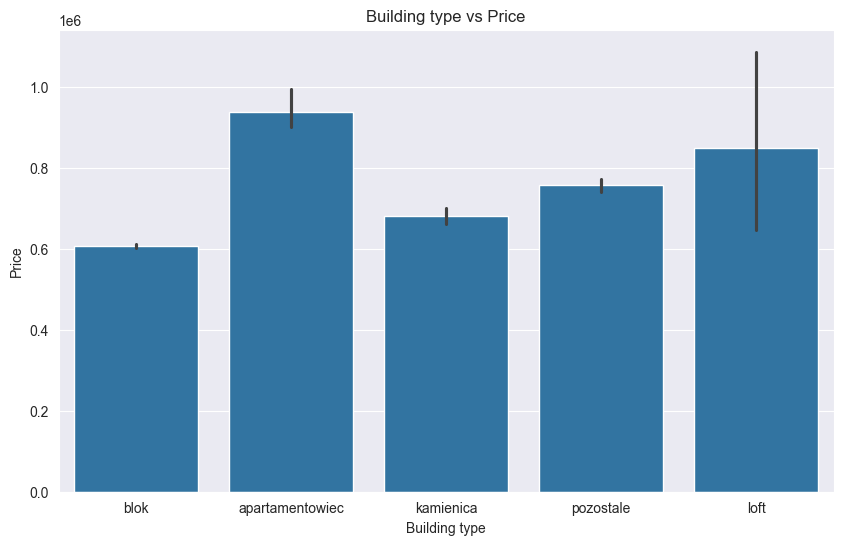

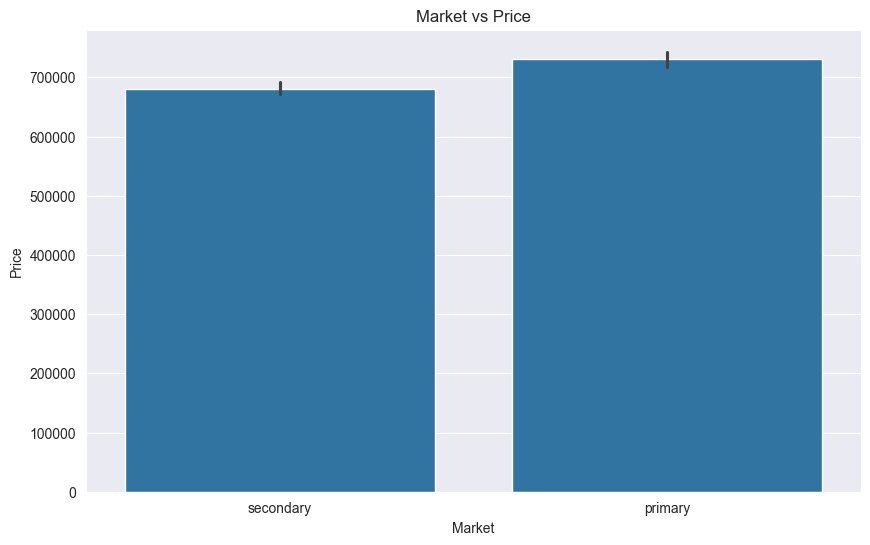

In [3]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

df = preprocessor.preprocessed_data.copy()

df = preprocessor.decode_data(df)

# Plotting location and price
plt.figure(figsize=(30, 12))
sns.barplot(x="City", y="Price",data=df)
plt.title("City vs Price")
plt.show()

# Plotting floor and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Floor", y="Price",data=df)
plt.title("Floor vs Price")
plt.show()

# Plotting area and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Area", y="Price", data=df)
plt.title("Area vs Price")
plt.show()

# Plotting room number and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Price",data=df)
plt.title("Rooms vs Price")
plt.show()

# Plotting room number and area
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Area",data=df)
plt.title("Rooms vs Area")
plt.show()

# Plotting if_furnished and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Furnished", y="Price",data=df)
plt.title("If Furnished vs Price")
plt.show()

# Plotting building type and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Building type", y="Price", data=df)
plt.title("Building type vs Price")
plt.show()

# Plotting market and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Market", y="Price", data=df)
plt.title("Market vs Price")
plt.show()

## Cleaning data

In [3]:
from src.filter_data import filter_preprocessor

filter_preprocessor(preprocessor)


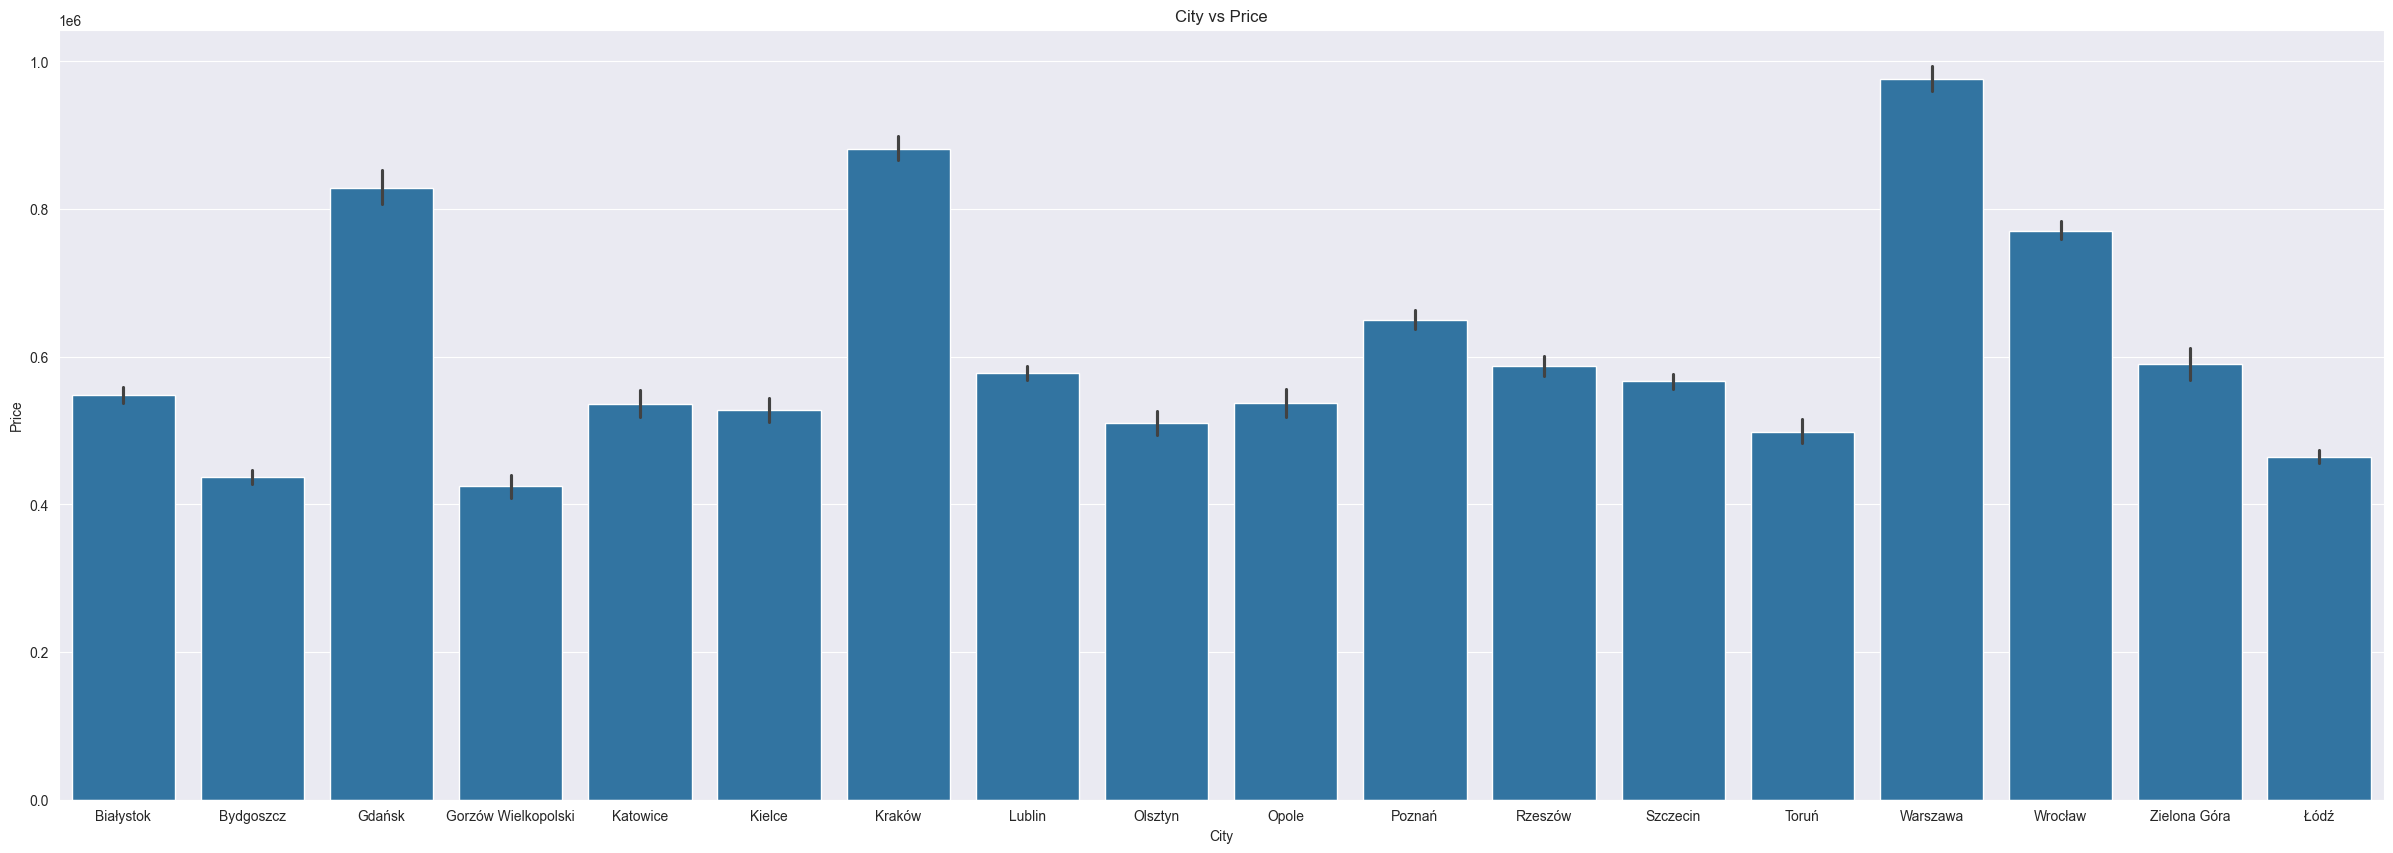

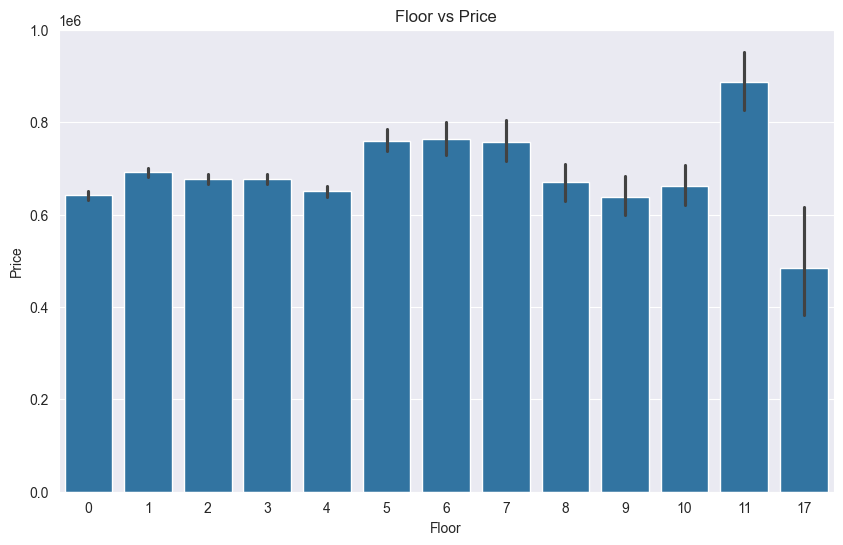

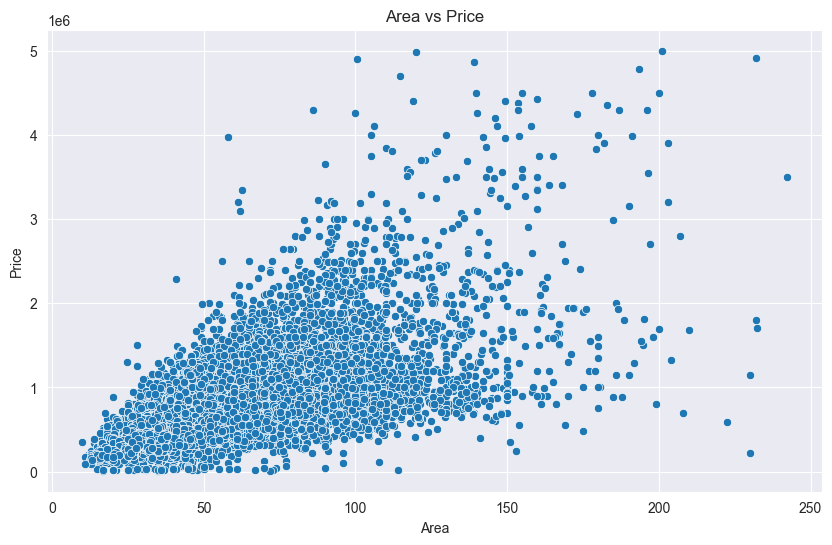

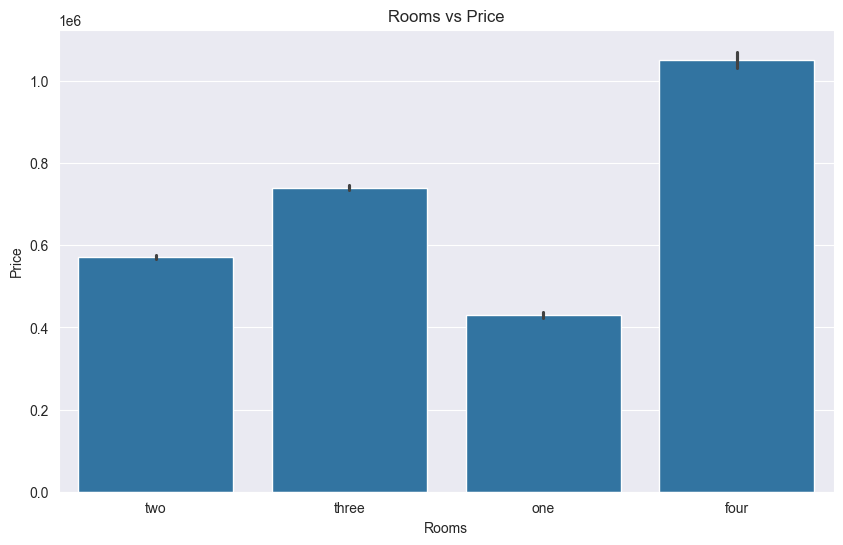

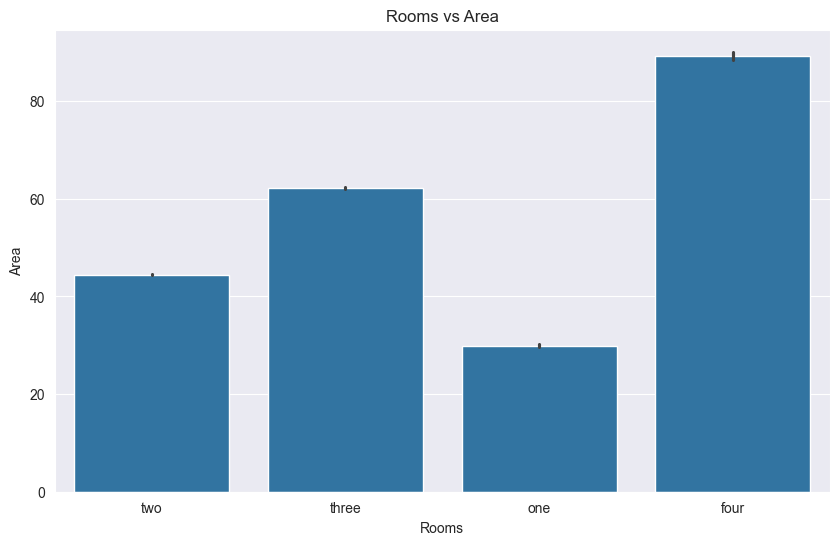

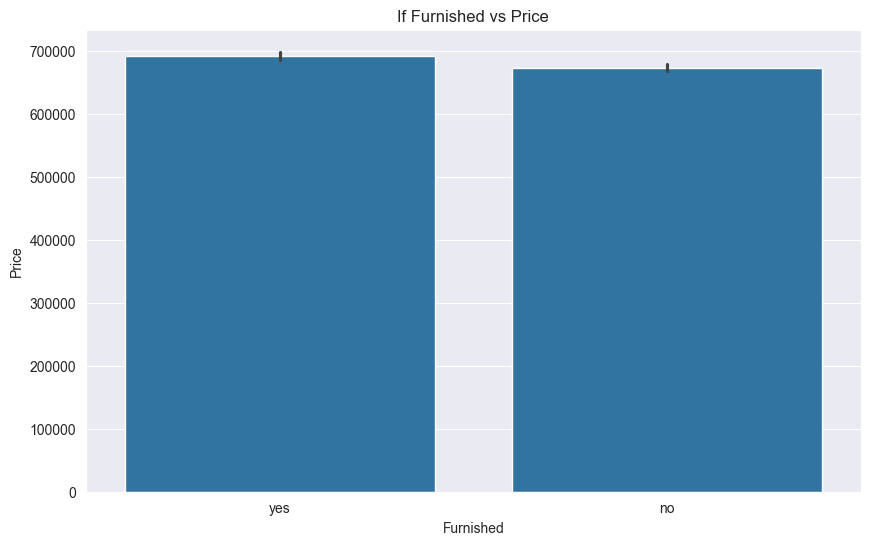

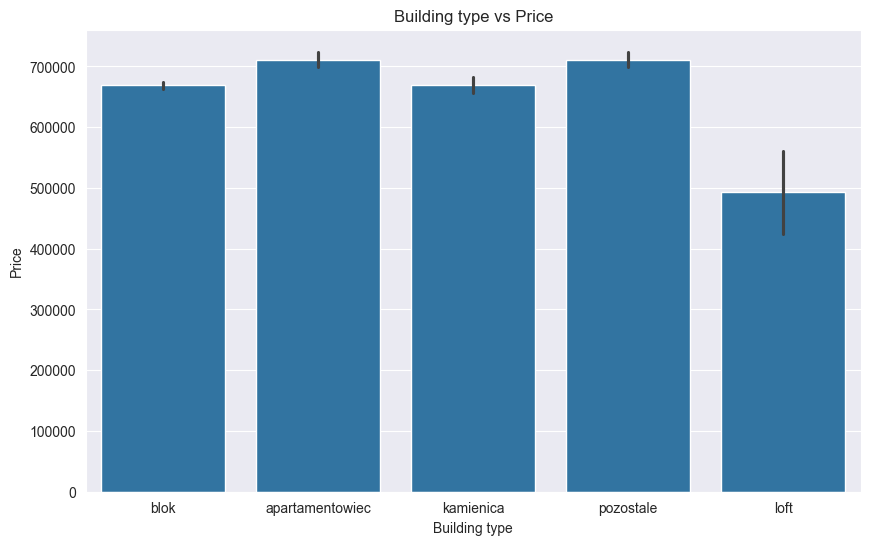

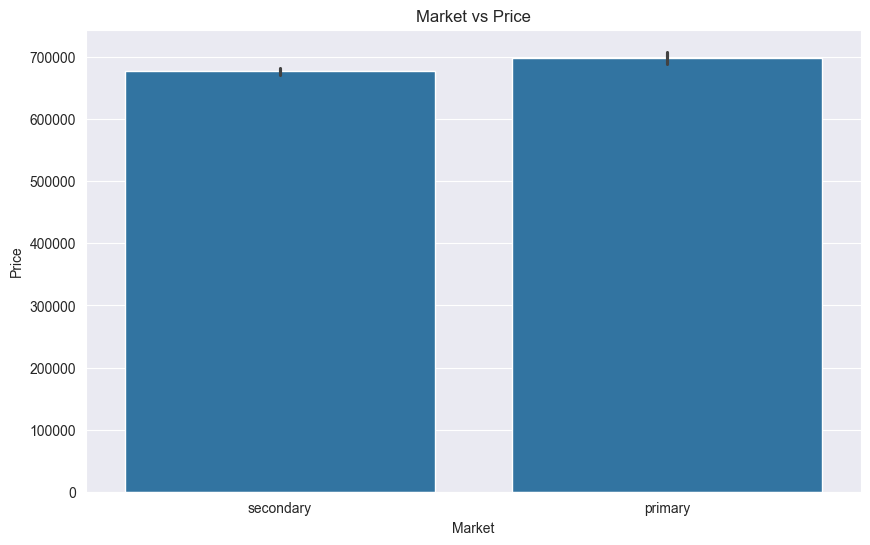

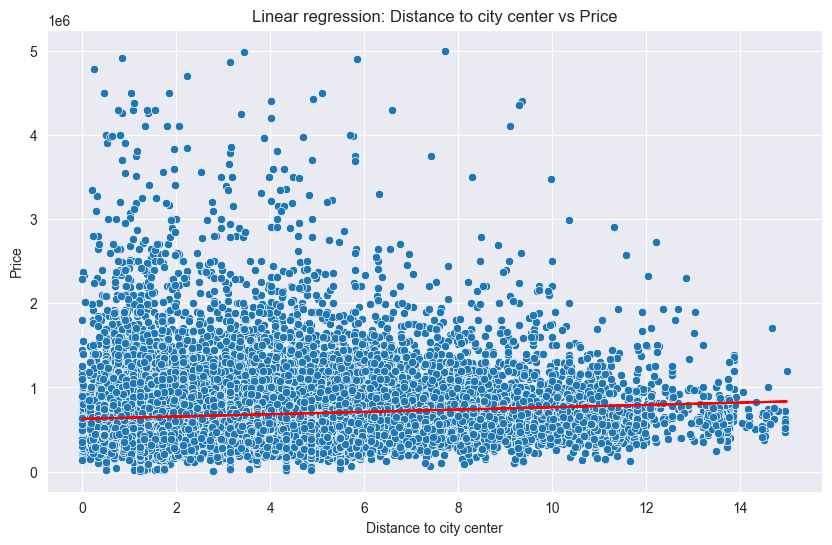

In [6]:
# Plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = preprocessor.preprocessed_data.copy()
df = preprocessor.decode_data(df)

# Plotting location and price
plt.figure(figsize=(30, 10))
sns.barplot(x="City", y="Price",data=df)
plt.title("City vs Price")
plt.show()

# Plotting floor and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Floor", y="Price",data=df)
plt.title("Floor vs Price")
plt.show()

# Plotting area and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Area", y="Price", data=df)
plt.title("Area vs Price")
plt.show()

# Plotting room number and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Price",data=df)
plt.title("Rooms vs Price")
plt.show()

# Plotting room number and area
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Area",data=df)
plt.title("Rooms vs Area")
plt.show()

# Plotting if_furnished and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Furnished", y="Price",data=df)
plt.title("If Furnished vs Price")
plt.show()

# Plotting building type and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Building type", y="Price", data=df)
plt.title("Building type vs Price")
plt.show()

# Plotting market and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Market", y="Price", data=df)
plt.title("Market vs Price")
plt.show()

# Plotting distance and price

linear_regression = LinearRegression().fit(df[["Distance to city center"]], df["Price"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Distance to city center", y="Price", data=df)
plt.plot(df["Distance to city center"], linear_regression.predict(df[["Distance to city center"]]), color='red')
plt.title("Linear regression: Distance to city center vs Price")
plt.show()


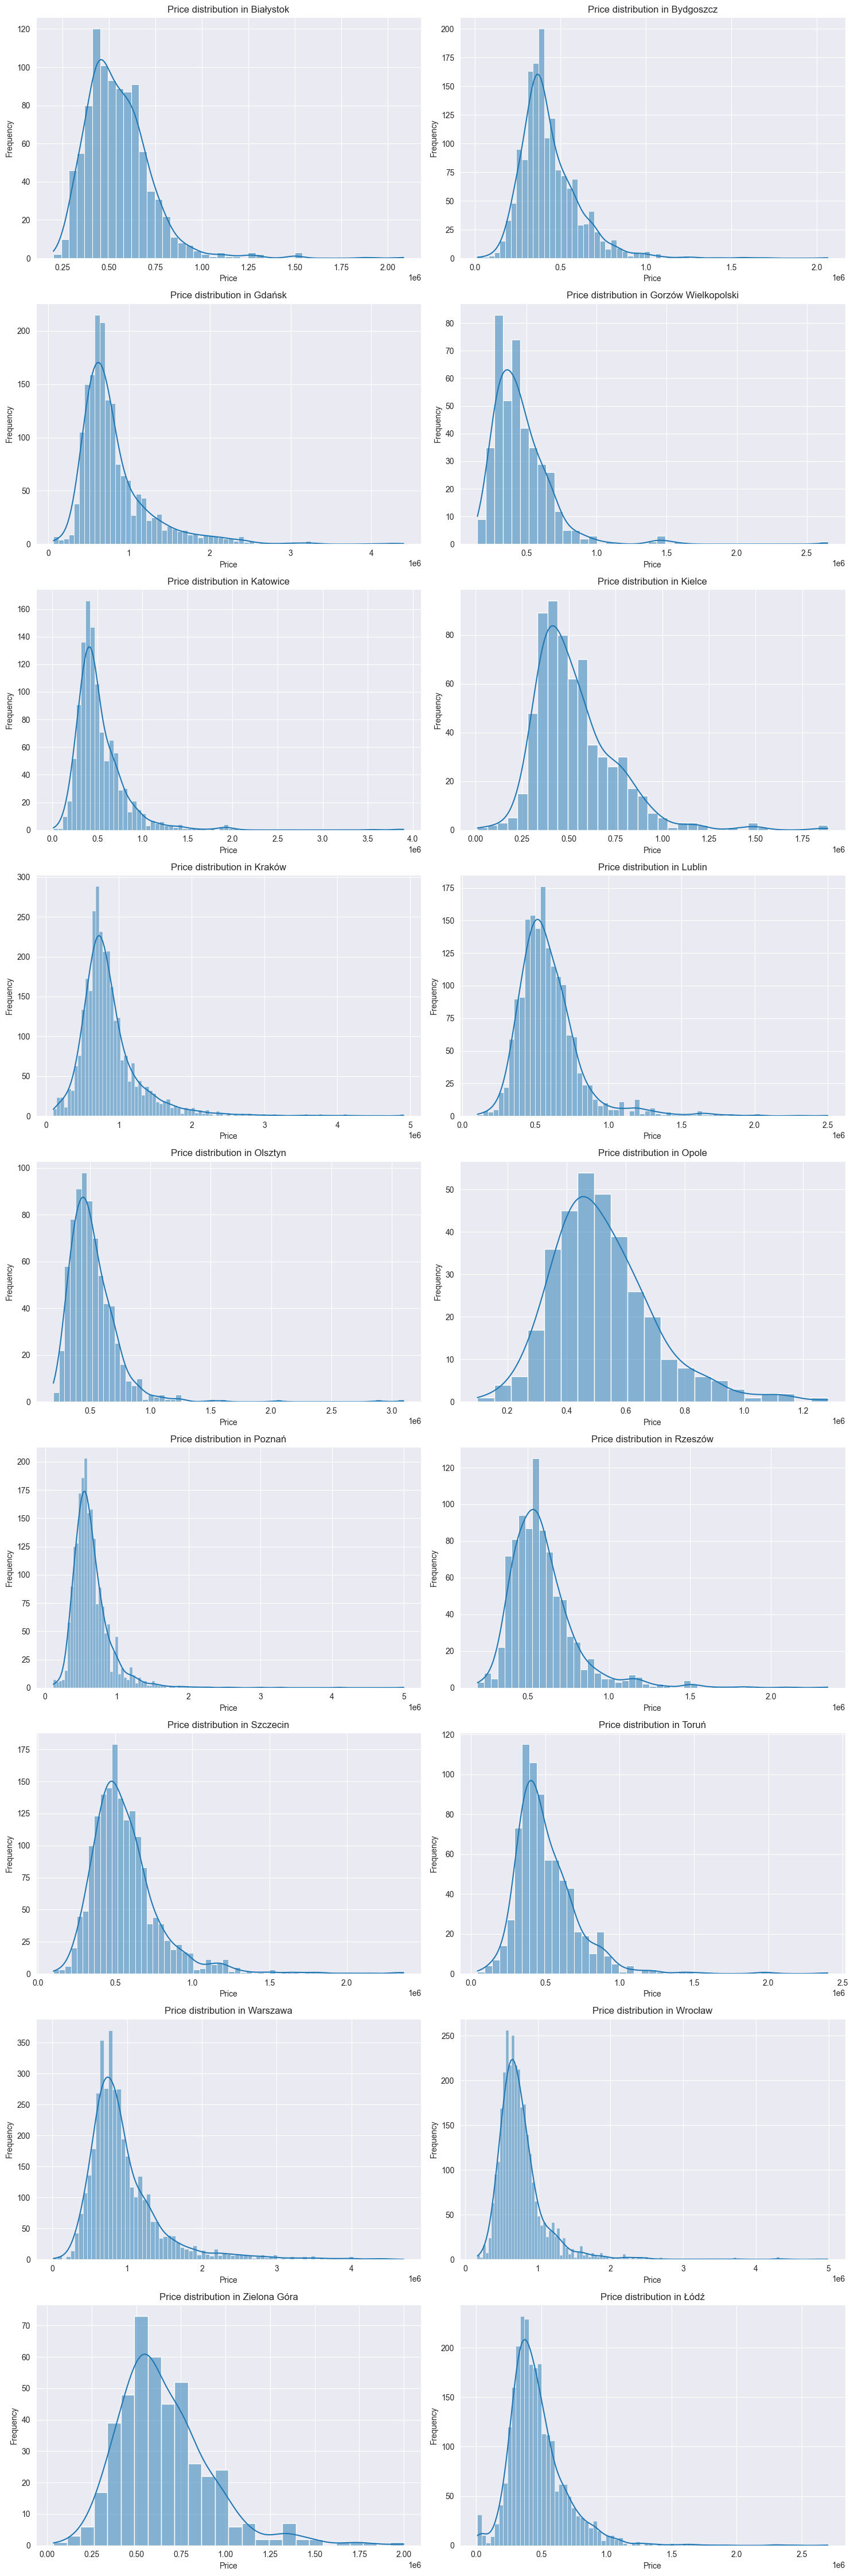

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data is decoded
df = preprocessor.decode_data(preprocessor.preprocessed_data.copy())

# Get the unique cities
unique_cities = df['City'].unique()

# Set the figure size and layout for multiple plots
fig, axes = plt.subplots(nrows=len(unique_cities)//2 + len(unique_cities)%2, ncols=2, figsize=(15, 5 * len(unique_cities)//2))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each city and create a histogram with KDE
for i, city in enumerate(unique_cities):
    ax = axes[i]
    city_data = df[df['City'] == city]
    sns.histplot(city_data['Price'], kde=True, ax=ax)
    ax.set_title(f'Price distribution in {city}')
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [5]:
from src.model import HousingPricePredictor

print(len(preprocessor.preprocessed_data))

predictor = HousingPricePredictor(data,preprocessor=preprocessor)


predicted_price = predictor.predict_price(city='Poznań')
print(f'Przewidywana cena mieszkania: {predicted_price:.2f} PLN')

mae = predictor.evaluate_model_by_city()
for city, mae_value in mae.items():
    print(f'Średni błąd bezwzględny dla miasta {city}: {mae_value:.2f} PLN')

27673
27514
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Przewidywana cena mieszkania: 655949.25 PLN
Średni błąd bezwzględny dla miasta Białystok: 78090.82 PLN
Średni błąd bezwzględny dla miasta Bydgoszcz: 80204.94 PLN
Średni błąd bezwzględny dla miasta Gdańsk: 203749.52 PLN
Średni błąd bezwzględny dla miasta Gorzów Wielkopolski: 118519.45 PLN
Średni błąd bezwzględny dla miasta Katowice: 117827.85 PLN
Średni błąd bezwzględny dla miasta Kielce: 90938.41 PLN
Średni błąd bezwzględny dla miasta Kraków: 146148.71 PLN
Średni błąd bezwzględny dla miasta Lublin: 96659.17 PLN
Średni błąd bezwzględny dla miasta Olsztyn: 99134.29 PLN
Średni błąd bezwzględny dla miasta Opole: 76242.67 PLN
Średni błąd bezwzględny dla miasta Poznań: 121867.08 PLN
Średni błąd bezwzględny dla miasta Rzeszów: 101198.55 PLN
Średni błąd bezwzględny dla miasta Szczecin: 122518.74 PLN
Średni błąd bezwzględny dla miasta Toruń: 95828.77 PLN
Średni błąd bezwzględny dla miasta Warszawa: 161241.72 PLN
Średni bł